## Project Objectives
1. Import Important Libraries
2. Define Connection Parameters(To the Database)
3. Define Connection String
4. Establish Connection
5. Close Connection
6. Make Visualization(Top 5 Grossing Concerts by Revenue)
7. Save Figure(Visualization)

###  Import  Libraries

In [1]:
import pandas as pd
import seaborn as sns
import pyodbc 
import matplotlib.pyplot as plt
import os

### Connection to the Database 

In [2]:
server = 'DESKTOP-U507UFU'
database = 'PRACTICE'
conn_str = (
    "Driver= {SQL Server};"
    f"Server={server};"
    f"Database={database};"
    "Trusted_Connection=yes;"    
)
conn = pyodbc.connect(conn_str)

In [3]:
query = """
             SELECT 
        concert_id,
        tickets_sold,
        city,
        sponsor,
        label,
        	artist_name,
            ticket_price_avg,
        	genre,
        	concert_revenue,
            profit
        FROM concerts AS c1 
        WHERE concert_revenue =(
        	SELECT MAX (concert_revenue)
        	FROM concerts AS c2
             WHERE c1.genre = c2.genre
       
        )
         ORDER BY concert_revenue DESC        
        ;
"""

In [4]:
df = pd.read_sql(query, conn)

C:\Users\User\AppData\Local\Temp\ipykernel_19816\1168034203.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


## Data Inpsection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   concert_id        5 non-null      int64  
 1   tickets_sold      5 non-null      object 
 2   city              5 non-null      object 
 3   sponsor           5 non-null      object 
 4   label             5 non-null      object 
 5   artist_name       5 non-null      object 
 6   ticket_price_avg  5 non-null      object 
 7   genre             5 non-null      object 
 8   concert_revenue   5 non-null      float64
 9   profit            5 non-null      object 
dtypes: float64(1), int64(1), object(8)
memory usage: 532.0+ bytes


In [6]:
df.describe()


,concert_id,concert_revenue
count,5.000000,5.000000
mean,36.000000,792936.806000
std,18.425526,133540.920734
min,10.000000,638938.120000
25%,30.000000,654919.010000
50%,33.000000,881544.540000
75%,50.000000,890812.810000
max,57.000000,898469.550000


In [7]:
df.shape

(5, 10)

In [8]:
df.head(20)

,concert_id,tickets_sold,city,sponsor,label,artist_name,ticket_price_avg,genre,concert_revenue,profit
0,57,44045,London,Pepsi,Big Hit Music,BTS,76.44,K-Pop,898469.55,1027459.95
1,50,49895,Tokyo,Nike,XO Records,The Weeknd,197.11,R&B/Pop,890812.81,929261.36
2,30,46583,Los Angeles,Coca-Cola,Republic Records,Ariana Grande,185.78,Pop,881544.54,740348.36
3,33,62482,London,Apple,Aftermath Entertainment,Eminem,134.49,Hip-Hop,654919.01,680193.93
4,10,72815,New York,Pepsi,Columbia Records,Beyonce,240.48,R&B,638938.12,541806.42


### Top 5 Perfoming Concerts by Concert Revenue 

In [9]:
Top5 = df.head(10).copy()

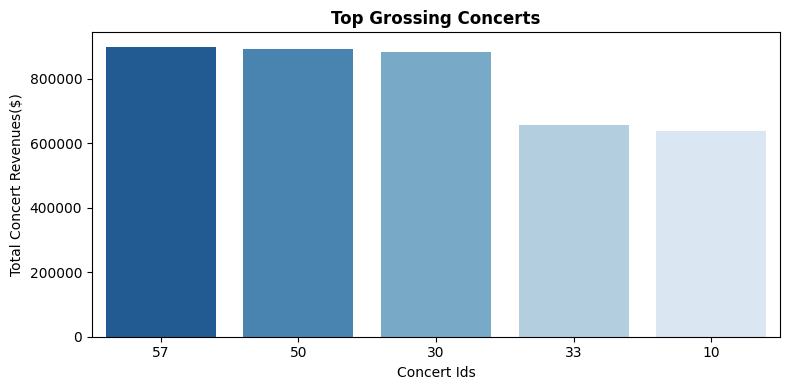

In [10]:
Top5['concert_id'] = Top5['concert_id'].astype(str)
plt.figure(figsize = (8,4))
colors = sns.color_palette("Blues", len(Top5))
sns.barplot(
    data = Top5,
    x = 'concert_id',
    palette =colors[::-1],
    y= 'concert_revenue',
    hue = 'concert_id',
)
plt.title('Top Grossing Concerts', fontweight= 'bold')
plt.xlabel('Concert Ids')
plt.ylabel('Total Concert Revenues($)')
plt.savefig("Top-Grossing Concerts.png", bbox_inches = 'tight', dpi = 300)
plt.tight_layout()
plt.show()

In [82]:
#Extract Out the Filtered  CSV for Power Bi Visualization and KPIs 
Top5.to_csv("Top5_concerts.csv", index =False)

In [11]:
#Location of the Visualization
print(os.getcwd())

D:\SQL  PRACTICE\music_concert\High Grossing Concerts
